### Name Entity From Capital Letter Words

In [3]:
#!pip install kneed

In [1]:
import pandas as pd
import numpy as np
import re
from kneed import KneeLocator

#### Capital Letter Word And Lower Letter Word

In [2]:
folder_name = "Italian"

In [4]:
df = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Capital/Not_Apply_Lower_Word_Merge_Result.csv") # Not apply lower technique
df

,word,frequency
0,di,13440299
1,che,12844913
2,e,11832597
3,un,8356940
4,non,8106108
...,...,...
746591,MoiraN,2
746592,Moir,2
746593,Southbend,2
746594,SCAPPO,2


In [4]:
df = df[df.iloc[:,1]>=5]
df

,word,frequency
0,que,20846601
1,a,19250735
2,o,16036274
3,de,14819832
4,não,9284895
...,...,...
417871,intusiasmado,5
417872,XXG,5
417873,inusualmente,5
417874,Fazemospartedo,5


In [5]:
def word_length(var):
    var = str(var)
    if len(var) <= 15:
        return var
    else:
        return "word is bigger than adjust value"

In [6]:
df = pd.DataFrame(df.iloc[:,0].apply(lambda x: word_length(x)))

In [7]:
df.drop(df[df.iloc[:,0] == "word is bigger than adjust value"].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,word
0,que
1,a
2,o
3,de
4,não
...,...
415145,intusiasmado
415146,XXG
415147,inusualmente
415148,Fazemospartedo


In [8]:
capital_word_list = []
lower_word_list = []
for i in df.iloc[:,0]:
    i = str(i)
    if i[0].isupper():
        capital_word_list.append(i)
    else:
        lower_word_list.append(i)

In [9]:
df_capital = pd.DataFrame(capital_word_list)
df_capital.rename(columns={0:"word"}, inplace=True)
df_capital = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_capital

,word
0,Não
1,O
2,E
3,É
4,Eu
...,...
233246,Platinol
233247,Perth
233248,Xxg
233249,Fazemospartedo


In [10]:
df_capital_to_lower = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x : x.lower()))
df_capital_to_lower

,word
0,não
1,o
2,e
3,é
4,eu
...,...
233246,platinol
233247,perth
233248,xxg
233249,fazemospartedo


In [11]:
df_lower = pd.DataFrame(lower_word_list)
df_lower.rename(columns={0:"word"}, inplace=True)
df_lower

,word
0,que
1,a
2,o
3,de
4,não
...,...
181894,idiotico
181895,insuspeitável
181896,homensnão
181897,intusiasmado


In [12]:
df_lower_to_lower = pd.DataFrame(df_lower.iloc[:,0].apply(lambda x : x.lower()))
df_lower_to_lower

,word
0,que
1,a
2,o
3,de
4,não
...,...
181894,idiotico
181895,insuspeitável
181896,homensnão
181897,intusiasmado


In [13]:
capital_set = set(df_capital_to_lower.iloc[:,0])

In [14]:
lower_set = set(df_lower_to_lower.iloc[:,0])

In [15]:
df_all_capital = pd.DataFrame(capital_set.difference(lower_set)) # compare capital letter word and lower letter word
df_all_capital.rename(columns={0:"word"}, inplace=True)
#df_all_capital = pd.DataFrame(df_all_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_all_capital

,word
0,artpop
1,dinkle
2,yasky
3,pensàmos
4,barém
...,...
123502,janaan
123503,tavra
123504,issac
123505,drinky


In [16]:
# Check result with all capital word
# df_merge = pd.merge(df_capital, df_all_capital, how="inner", on="word")
# df_merge.drop_duplicates(inplace=True)
# df_merge.reset_index(drop=True, inplace=True)
# df_merge

In [17]:
df_all_capital.to_excel("All_Time_Capital_Letter_Words.xlsx", sheet_name="Word", index=False)

#### Sentence First Word Analysis

In [18]:
df_sent = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Sentence/Merge/Sentence_Merge.csv") # Sentence Merge Result
df_sent

,sentence,frequency
0,sim,1111780
1,não,1058124
2,está bem,471462
3,o quê,432155
4,obrigado,346670
...,...,...
7476428,e um gabinete como este,3
7476429,tudo bem mas estás sentando na minha cabeça,3
7476430,escute me sairemos disto juntos está bem,3
7476431,tudo bem mas deixe de chamar outros para o mesmo,3


In [22]:
#df_sent = df_sent[df_sent.iloc[:,1]>=5]

In [19]:
first_words = []
for i in df_sent.iloc[:,0]: # Select sentence first word
    words = re.findall("\w+", i, re.UNICODE)
    first_words.append(words[0])

In [20]:
first_ser = pd.Series(first_words)
first_ser

0               sim
1               não
2              está
3                 o
4          obrigado
             ...   
7476428           e
7476429        tudo
7476430      escute
7476431        tudo
7476432           é
Length: 7476433, dtype: object

In [21]:
df_first = pd.DataFrame(first_ser.value_counts(ascending=False))
df_first.reset_index(inplace=True)
df_first.rename(columns={"index":"word", 0:"frequency"}, inplace=True)
df_first

,word,frequency
0,não,477752
1,o,353267
2,e,247687
3,é,213784
4,a,212890
...,...,...
133837,apaixonávamo,1
133838,mariquinha,1
133839,apalermado,1
133840,marieme,1


In [22]:
set_first = set(df_first.iloc[:,0])

In [23]:
set_all_capital = set(df_all_capital.iloc[:,0])

In [24]:
df_all_spec = pd.DataFrame(set_all_capital.difference(set_first)) # Capital letter word and first sentence word
df_all_spec.rename(columns={0:"word"}, inplace=True)
df_all_spec

,word
0,yahlt
1,feidler
2,dinkle
3,yasky
4,vinicio
...,...
76873,tavra
76874,pradas
76875,booly
76876,drinky


In [25]:
df_all_spec.to_excel("Special_Name_Exactly_Full.xlsx", sheet_name="Spec_Name", index=False)

#### Spec Name Knee Point

In [26]:
df_word = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Merge/Word_Merge.csv") # for frequency
df_word

,word,frequency
0,que,22182513
1,a,22151153
2,o,21751123
3,não,17756980
4,de,15384404
...,...,...
283627,conection,5
283628,gjakmarrja,5
283629,transcon,5
283630,gjallarhorn,5


In [27]:
df_all_spec_freq = pd.merge(df_word, df_all_spec, how="inner", on="word") # frequency value
df_all_spec_freq

,word,frequency
0,qaeda,2507
1,artagnan,1733
2,zelândia,1702
3,pelt,1361
4,sox,1346
...,...,...
69861,broza,5
69862,gizmodo,5
69863,gjakmarrja,5
69864,transcon,5


In [28]:
total_freq_spec = df_all_spec_freq.iloc[:,1].sum()
total_freq_spec

1444717

In [29]:
df_all_spec_freq["ratio"] = round(((df_all_spec_freq.iloc[:,1]/total_freq_spec)*100),7)
df_all_spec_freq

,word,frequency,ratio
0,qaeda,2507,0.173529
1,artagnan,1733,0.119954
2,zelândia,1702,0.117808
3,pelt,1361,0.094205
4,sox,1346,0.093167
...,...,...,...
69861,broza,5,0.000346
69862,gizmodo,5,0.000346
69863,gjakmarrja,5,0.000346
69864,transcon,5,0.000346


In [30]:
df_all_spec_freq["cumul_ratio"] = np.cumsum(df_all_spec_freq.iloc[:,2])
df_all_spec_freq

,word,frequency,ratio,cumul_ratio
0,qaeda,2507,0.173529,0.173529
1,artagnan,1733,0.119954,0.293483
2,zelândia,1702,0.117808,0.411292
3,pelt,1361,0.094205,0.505497
4,sox,1346,0.093167,0.598664
...,...,...,...,...
69861,broza,5,0.000346,99.998457
69862,gizmodo,5,0.000346,99.998803
69863,gjakmarrja,5,0.000346,99.999149
69864,transcon,5,0.000346,99.999495


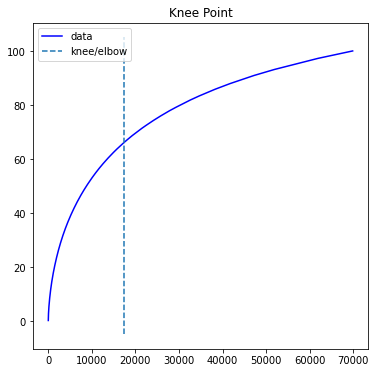

In [31]:
spec_kneedle = KneeLocator(x=df_all_spec_freq.cumul_ratio.index, y=df_all_spec_freq.cumul_ratio, S=1.0, curve="concave", direction="increasing")
spec_kneedle.plot_knee()

In [32]:
print(round(spec_kneedle.knee_y))

66


In [33]:
knee_point_spec = round(spec_kneedle.knee_y)

In [34]:
df_spec_knee = df_all_spec_freq[df_all_spec_freq.cumul_ratio <= knee_point_spec]
df_spec_knee

,word,frequency,ratio,cumul_ratio
0,qaeda,2507,0.173529,0.173529
1,artagnan,1733,0.119954,0.293483
2,zelândia,1702,0.117808,0.411292
3,pelt,1361,0.094205,0.505497
4,sox,1346,0.093167,0.598664
...,...,...,...,...
17315,zoman,21,0.001454,65.993905
17316,bernabé,21,0.001454,65.995359
17317,razani,21,0.001454,65.996812
17318,arkett,21,0.001454,65.998266


In [35]:
df_spec_knee.to_excel("Special_Name_Exactly_Knee.xlsx", sheet_name="Spec_Name", index=False)

#### First 100 000 Word And Spec Name Analysis

In [36]:
df_word = pd.read_csv(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{folder_name}/Result/Word/Merge/Word_Merge.csv") # Word Merge Result
df_word = df_word.head(100000)
df_word

,word,frequency
0,que,22182513
1,a,22151153
2,o,21751123
3,não,17756980
4,de,15384404
...,...,...
99995,vineland,54
99996,provassem,54
99997,tits,54
99998,kheros,54


In [37]:
set_word = set(df_word.iloc[:,0])

In [38]:
set_spec_knee = set(df_spec_knee.iloc[:,0])

In [39]:
df_word_spec = pd.DataFrame(set_word.intersection(set_spec_knee))
df_word_spec.rename(columns={0:"word"}, inplace=True)
df_word_spec

,word
0,dinkle
1,lemond
2,svu
3,calixto
4,minassian
...,...
4912,drewett
4913,hurd
4914,allister
4915,irons


In [40]:
df_word_spec.to_excel("Special_Name_In_Adjust_Word.xlsx", sheet_name="Spec_Name", index=False)